<a href="https://colab.research.google.com/github/shahidul034/Data-Structures-and-Algorithm-Tutorial/blob/main/Updated__Hidden_Markov_model_for_part_of_speech_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This tutorial is for Part-of-Speech Tagging using the Hidden Markov model.**




**Author: Md. Shahidul Salim**

  **Lecturer, CSE,KUET**

Dataset-WordChat: Tag Frequency Analysis

For each tag in the dataset, we calculate its frequency:
1. Utilize a random number generator to assign IDs
2. Count tag occurrences across all entries
3. Record the number of times each unique tag appears

This provides a baseline distribution of tags in WordChat for further analysis.

In [ ]:
import random
tags=['VB','MD','NN']
tag={}
for x in tags:
  tag[x]=random.randint(10001,20000)
  print(f"No. of {x}: {tag[x]}")

No. of VB: 13913
No. of MD: 19148
No. of NN: 15292




$$
p_i[i] \text{ is the probability that the Markov chain will start in state } i
$$

In [ ]:
pi={}
total=1
cnt=0
while(cnt<len(tags)-1):
  val=random.uniform(0,.7)
  if (total-val)>0:
    pi[tags[cnt]]=val
    total-=val
    cnt+=1
pi[tags[len(tags)-1]]=total
for x in tags:
  print(f"Starting probabitity {x}: {pi[x]}")

Starting probabitity VB: 0.609159528005516
Starting probabitity MD: 0.02576944797097015
Starting probabitity NN: 0.3650710240235139


$$\text{Pair}(tag[i], tag[j]) = \text{count of transitions from } tag[i] \text{ to } tag[j] \text{ in dataset}$$

In [ ]:
tag_pair={}
for x in tags:
  for x2 in tags:
    val=random.randint(4000,9500)
    tag_pair[x+"-"+x2]=val
    print(f"{x}-{x2} : {val}")

VB-VB : 6269
VB-MD : 5122
VB-NN : 7033
MD-VB : 9398
MD-MD : 9045
MD-NN : 6599
NN-VB : 9191
NN-MD : 5430
NN-NN : 6453


**Transition probability(A)**

$$P(tag[j]|tag[i]) = \frac{\text{count}(tag[i] \rightarrow tag[j])}{\text{count}(tag[i])}$$

where:
- $$\text{count}(tag[i] \rightarrow tag[j]) \text{is the number of times tag[i] is followed by tag[j]}$$
- $$\text{count}(tag[i]) \text{is the total number of times tag[i] appears}$$

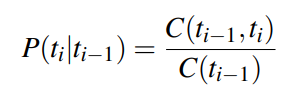

In [ ]:
transition_prob={}
for x in tags:
  for x2 in tags:
    _pair=x+"|"+x2
    transition_prob[_pair]=tag_pair[x2+"-"+x]/float(tag[x2])
    print(f"p({x}|{x2}):{transition_prob[_pair]}")


p(VB|VB):0.4505857830805721
p(VB|MD):0.49080843952371006
p(VB|NN):0.6010332199843055
p(MD|VB):0.3681449004528139
p(MD|MD):0.4723730937956967
p(MD|NN):0.35508762751765627
p(NN|VB):0.5054984546826709
p(NN|MD):0.3446312930854397
p(NN|NN):0.421985351817944


**Emission probability(B) for sentence: "race will begin"**.

$$\text{Pair}(word, tag) = \text{count of occurrences where } word \text{ is labeled with } tag \text{ in dataset}$$

In [ ]:
sentence=['race','will','begin']
tag_word={}
for x in tags:
  for x2 in sentence:
    _tag_word=x+"-"+x2
    tag_word[_tag_word]=random.randint(4000,9000)
    print(f"{_tag_word}: {tag_word[_tag_word]}")


VB-race: 8277
VB-will: 8119
VB-begin: 6786
MD-race: 7177
MD-will: 8254
MD-begin: 8480
NN-race: 4665
NN-will: 6944
NN-begin: 7361


$$P(word[i]|tag[i]) = \frac{\text{count}(word[i], tag[i])}{\text{count}(tag[i])}$$

where:
- $$\text{count}(word[i], tag[i]) \text { is the number of times word[i] appears with tag[i]}$$
- $$\text{count}(tag[i]) \text{is the total count of tag[i]}$$

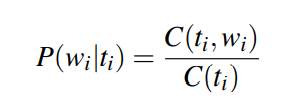

In [ ]:
emission_prob={}
for x in tags:
  for x2 in sentence:
    _tag_word=x+"-"+x2
    p_tag_word2=x2+"|"+x
    emission_prob[p_tag_word2]=tag_word[_tag_word]/float(tag[x])
    print(f"p({p_tag_word2}) :{emission_prob[p_tag_word2]}")

p(race|VB) :0.5949112340976066
p(will|VB) :0.5835549486092144
p(begin|VB) :0.4877452742039819
p(race|MD) :0.3748172132859829
p(will|MD) :0.43106329642782537
p(begin|MD) :0.4428660956757886
p(race|NN) :0.3050614700496992
p(will|NN) :0.45409364373528643
p(begin|NN) :0.481362804080565


In [ ]:
from itertools import permutations
for x in permutations(tag):
  print(x)

('VB', 'MD', 'NN')
('VB', 'NN', 'MD')
('MD', 'VB', 'NN')
('MD', 'NN', 'VB')
('NN', 'VB', 'MD')
('NN', 'MD', 'VB')


For sentence "race will begin", we calculate:

$$\text{Score}(t_1,t_2,t_3) = P(t_1) \times P(\text{race}|t_1) \times P(t_2|t_1) \times P(\text{will}|t_2) \times P(t_3|t_2) \times P(\text{begin}|t_3)$$

where:
- $$t_1, t_2, t_3 \text{ are possible tags for each word}$$
- $$P(t_1) \text{ is initial probability}$$
- $$P(\text{word}|t_i) \text{ is emission probability}$$
- $$P(t_j|t_i) \text{ is transition probability}$$

The tag sequence with highest probability score is the predicted sequence.

For part-of-speech tagging, the goal of HMM decoding is to choose the tag sequence t1 ...tn that is most probable given the observation sequence of n words w1 ...wn:

For Hidden Markov Model (HMM) decoding in POS tagging, we find:

$$\hat{t}_1^n = \underset{t_1...t_n}{\operatorname{argmax}} P(t_1...t_n|w_1...w_n)$$

By applying Bayes' rule and dropping the denominator (since it's constant for all tag sequences):

$$\hat{t}_1^n = \underset{t_1...t_n}{\operatorname{argmax}} P(w_1...w_n|t_1...t_n)P(t_1...t_n)$$

Where:
- $\hat{t}_1^n$ is the most probable tag sequence
- $w_1...w_n$ is the observed word sequence
- $P(w_1...w_n|t_1...t_n)$ is the emission probability
- $P(t_1...t_n)$ is the transition probability

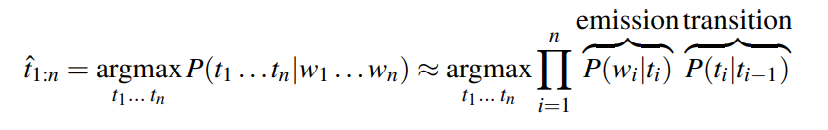

The probability of a tag sequence can be expressed as:

$$P(\text{tag sequence}) = \prod_{i=1}^n P(t_i|w_i)P(t_i|t_{i-1})$$

Where:
- $t_i$ represents tag at position $i$
- $w_i$ represents word at position $i$
- $\pi_{t_1}$ is the initial probability of first tag
- $P(t_i|w_i)$ is the emission probability
- $P(t_i|t_{i-1})$ is the transition probability between consecutive tags


# Hidden Markov Model (HMM) for POS Tagging: Equation Derivation

## Step 1: Understanding the Equations

### Equation (1):
$$\hat{t}_1^n = \underset{t_1...t_n}{\operatorname{argmax}} P(w_1...w_n|t_1...t_n)P(t_1...t_n)$$

This represents the goal of POS tagging: finding the most likely sequence of tags $\hat{t}_1^n$ for a given sequence of words $w_1, \ldots, w_n$.

* $P(w_1...w_n|t_1...t_n)$: Likelihood of the word sequence given the tag sequence
* $P(t_1...t_n)$: Prior probability of the tag sequence

### Equation (2):
$$P(\text{tag sequence}) = \prod_{i=1}^n P(w_i|t_i)P(t_i|t_{i-1})$$

This reformulates the joint probability $P(w_1...w_n, t_1...t_n)$ in terms of:
* $P(w_i|t_i)$: Emission probability (word $w_i$ given tag $t_i$)
* $P(t_i|t_{i-1})$: Transition probability (tag $t_i$ given previous tag $t_{i-1}$)

## Step 2: Breaking Down Equation (1)

Expand the joint probability:
$$P(w_1...w_n|t_1...t_n)P(t_1...t_n) = P(w_1...w_n, t_1...t_n)$$

In an HMM, this joint probability decomposes into:
$$P(w_1...w_n, t_1...t_n) = P(t_1...t_n) \cdot P(w_1...w_n|t_1...t_n)$$

## Step 3: HMM Assumptions

1. **Markov assumption (transition probabilities):**
   $$P(t_1...t_n) = \prod_{i=1}^n P(t_i|t_{i-1})$$

2. **Emission independence:**
   $$P(w_1...w_n|t_1...t_n) = \prod_{i=1}^n P(w_i|t_i)$$

## Step 4: Joint Probability Rewrite

Using HMM assumptions:
$$P(w_1...w_n, t_1...t_n) = \prod_{i=1}^n P(w_i|t_i) \cdot P(t_i|t_{i-1})$$

## Step 5: Final Form

The probability of the tag sequence becomes:
$$P(\text{tag sequence}) = \prod_{i=1}^n P(w_i|t_i)P(t_i|t_{i-1})$$

This matches our decomposition of the joint probability $P(w_1...w_n, t_1...t_n)$ under the HMM framework.

In [ ]:
def decoding(tag_seq):
  #Starting probability of tag_seq 0 = pi[tag_seq[0]]
  #Emission probability=emission_prob[sentence[0]+"|"+tag_seq[0]] ///Ex: P(Race|VB)
  #Transition probability=transition_prob[tag_seq[1]+"|"+tag_seq[0]] ///Ex: P(VB|MD)
  prob=emission_prob[sentence[0]+"|"+tag_seq[0]]*pi[tag_seq[0]] * emission_prob[sentence[1]+"|"+tag_seq[1]]*transition_prob[tag_seq[1]+"|"+tag_seq[0]] * emission_prob[sentence[2]+"|"+tag_seq[2]]*transition_prob[tag_seq[2]+"|"+tag_seq[1]]
  return prob

In [ ]:
from itertools import permutations
max_prob=0.0
for p in permutations(tag):
  ans=decoding(list(p))
  print(f"{p}: {ans}")
  if ans> max_prob:
    max_prob=max(ans,max_prob)
    tag_seq=p
print(f"Final tag sequence: {tag_seq}:{max_prob}")

('VB', 'MD', 'NN'): 0.022620738133530768
('VB', 'NN', 'MD'): 0.014395512665967376
('MD', 'VB', 'NN'): 0.013221340119161127
('MD', 'NN', 'VB'): 0.012655040261265845
('NN', 'VB', 'MD'): 0.004825935520954649
('NN', 'MD', 'VB'): 0.004952764884434805
Final tag sequence: ('VB', 'MD', 'NN'):0.022620738133530768


**Reference:** Speech and Language Processing: An Introduction to Natural Language Processing, Computational Linguistics and Speech Recognition-Dan Jurafsky